In [ ]:
#!/usr/bin/python
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
# from feature_format import featureFormat, targetFeatureSplit
import pandas as pd
import numpy as np
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list = ['poi','to_messages', 'deferred_income',
       'salary', 'total_stock_value', 'expenses', 'restricted_stock',
       'from_poi_to_this_person', 'long_term_incentive',
       'from_this_person_to_poi', 'total_payments', 'exercised_stock_options',
       'other', 'from_messages', 'bonus', 'shared_receipt_with_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)


In [ ]:
### Task 2: Remove outliers

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict
my_dataset.pop('TOTAL')
df = pd.DataFrame.from_dict(my_dataset,orient='index')
df = df.replace('NaN',np.nan)
df['name'] = df.index
df = df.reset_index()
df['index'] = df.index
df['poi'] = df['poi'].apply(lambda x: 1 if x else 0)
df = df.fillna('NaN')

my_dataset = data_dict
dataset = df.T.to_dict()
## 3.2 add new features to dataset
def compute_fraction(poi_messages, all_messages):
    """ return fraction of messages from/to that person to/from POI"""    
    if poi_messages == 'NaN' or all_messages == 'NaN':
        return 0.
    fraction = poi_messages / all_messages
    return fraction

for name in my_dataset:
    data_point = my_dataset[name]
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = compute_fraction(from_poi_to_this_person, to_messages)
    data_point["fraction_from_poi"] = fraction_from_poi
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = compute_fraction(from_this_person_to_poi, from_messages)
    data_point["fraction_to_poi"] = fraction_to_poi





features_list = ["poi", "fraction_from_poi", "fraction_to_poi", 'shared_receipt_with_poi']
### Extract features and labels from dataset for local testing
data = featureFormat(dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

svm = Pipeline([('scaler',StandardScaler()),("kbest", SelectKBest()),('svm',svm.SVC())])
param_grid = ([{'svm__C': [100],'svm__gamma': [0.1],'svm__degree':[2],'svm__kernel': ['poly'],'kbest__k':['all']}])
clf = GridSearchCV(svm, param_grid, scoring='recall').fit(features, labels).best_estimator_


In [ ]:
dataset

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test =train_test_split(features, labels, test_size=0.1, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier( n_estimators=20,min_samples_split=5)

clf.fit(features_train,labels_train)
pred=clf.predict(features_test)
# acc=accuracy_score(pred,labels_test)

In [ ]:
acc=accuracy_score(pred,labels_test)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print ("NB ccuracy = ",accuracy)
print ('precision = ', precision_score(labels_test,pred))
print ('recall = ', recall_score(labels_test,pred))

from sklearn.metrics import classification_report
print(classification_report(pred,labels_test))

param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'

####

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print ("SVM ccuracy = ", acc)
print ('precision = ', precision_score(labels_test,pred))
print ('recall = ', recall_score(labels_test,pred))

In [ ]:
from tester import test_classifier
test_classifier(clf, my_dataset, features_list)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tester import test_classifier
scaler = MinMaxScaler()
select = SelectKBest()
gnb = GaussianNB()
features_list = ["poi", "fraction_from_poi", "fraction_to_poi", 'shared_receipt_with_poi']
steps = [('scaler', scaler),
('feature_select', select),
('classifier', gnb)]
param_grid = {'feature_select__k': range(1,17)}
sss = StratifiedShuffleSplit(100, test_size=0.3, random_state = 0)
pipe = Pipeline(steps)
gs = GridSearchCV(pipe, param_grid, cv=sss, scoring='f1')
gs.fit(features_train, labels_train)
clf = gs.best_estimator_
test_classifier(clf, my_dataset, features_list)

Outliers name =  LOCKHART EUGENE E


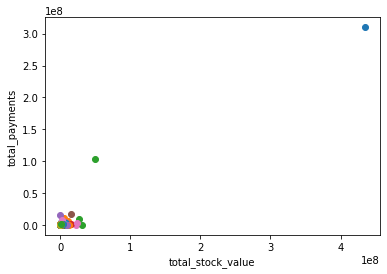

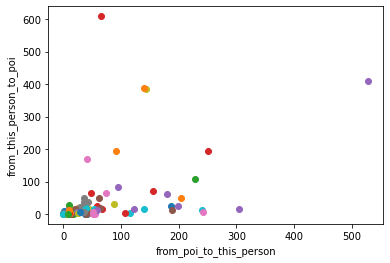

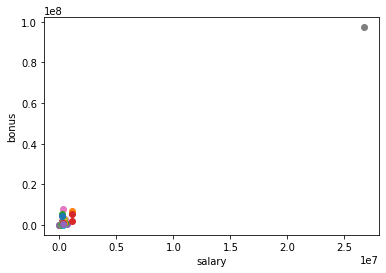

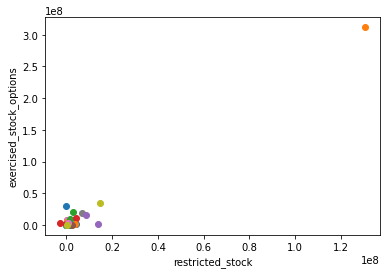

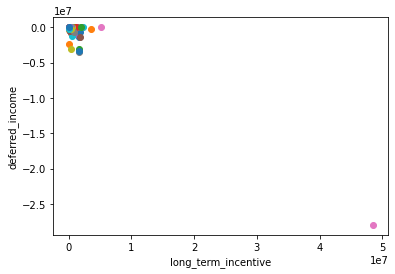

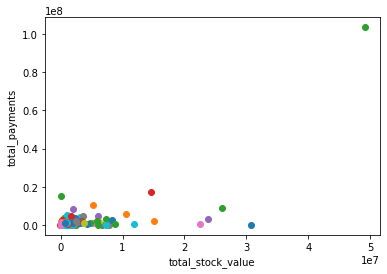

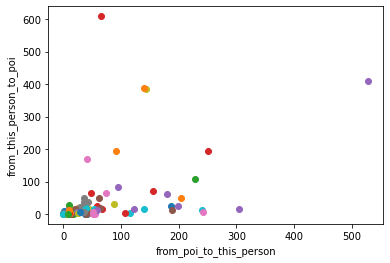

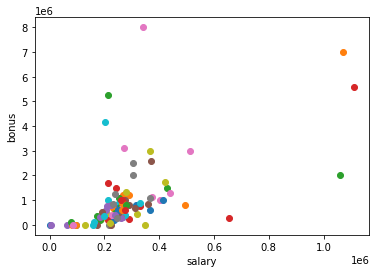

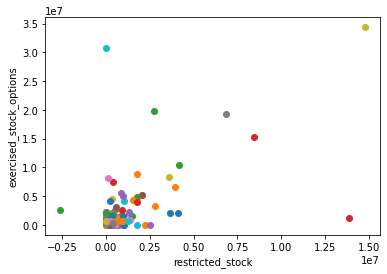

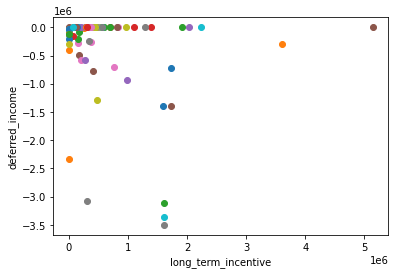

Percentage of persons who has email data =  60.13986013986013 %
poi  =  100.0 %
fraction_to_this_person_from_poi  =  100.0 %
fraction_form_this_person_to_poi  =  100.0 %
total_stock_value  =  87.41258741258741 %
total_payments  =  86.01398601398601 %
restricted_stock  =  76.22377622377621 %
exercised_stock_options  =  70.62937062937063 %
salary  =  65.73426573426573 %
expenses  =  65.73426573426573 %
other  =  63.63636363636363 %
to_messages  =  60.13986013986013 %
from_poi_to_this_person  =  60.13986013986013 %
from_messages  =  60.13986013986013 %
from_this_person_to_poi  =  60.13986013986013 %
shared_receipt_with_poi  =  60.13986013986013 %
bonus  =  56.64335664335665 %
long_term_incentive  =  45.45454545454545 %
deferred_income  =  33.56643356643357 %
deferral_payments  =  26.573426573426573 %
restricted_stock_deferred  =  11.888111888111888 %
director_fees  =  11.188811188811188 %
loan_advances  =  2.097902097902098 %


ValueError: n_components=15 must be between 0 and min(n_samples, n_features)=6 with svd_solver='full'

In [3]:
#!/usr/bin/python

import sys
import pickle

import matplotlib.pyplot
from sklearn import preprocessing, decomposition
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

sys.path.append("../tools/")

# from tools.feature_format import featureFormat, targetFeatureSplit
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier


def showData(data_set, first_feature, second_feature):
    data = featureFormat(data_set, [first_feature, second_feature])
    for point in data:
        x = point[0]
        y = point[1]
        matplotlib.pyplot.scatter(x, y)

    matplotlib.pyplot.xlabel(first_feature)
    matplotlib.pyplot.ylabel(second_feature)
    matplotlib.pyplot.show()


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
# You will need to use more features

financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                      'restricted_stock_deferred', 'deferred_income', 'total_stock_value',
                      'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock',
                      'director_fees']

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
                  'shared_receipt_with_poi']

POI_label = ['poi']

fraction_features = ['fraction_to_this_person_from_poi', 'fraction_form_this_person_to_poi']

all_features_list = POI_label + financial_features + email_features + fraction_features
all_features_list.remove('email_address')

my_features = ['total_stock_value', 'restricted_stock', 'exercised_stock_options', 'salary', 'bonus', 'deferred_income',
               'long_term_incentive']







features_list = POI_label + my_features + fraction_features

# features_list = all_features_list
# features_list.remove('email_address')

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
# remove persons who don't have any feature value
for name in data_dict:
    data_without_feature = True
    for feature in data_dict.get(name):
        if (feature != 'poi' and data_dict.get(name)[feature] != 'NaN'):
            data_without_feature = False
            break
    if (data_without_feature == True):
        print ('Outliers name = ', name)

# Visualize data to identify outliers
showData(data_dict, 'total_stock_value', 'total_payments')
showData(data_dict, 'from_poi_to_this_person', 'from_this_person_to_poi')
showData(data_dict, 'salary', 'bonus')
showData(data_dict, 'restricted_stock', 'exercised_stock_options')
showData(data_dict, 'long_term_incentive', 'deferred_income')

data_dict.pop("TOTAL", 0)
data_dict.pop("LOCKHART EUGENE E", 0)
data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0)

# Visualize data after removing outliers
showData(data_dict, 'total_stock_value', 'total_payments')
showData(data_dict, 'from_poi_to_this_person', 'from_this_person_to_poi')
showData(data_dict, 'salary', 'bonus')
showData(data_dict, 'restricted_stock', 'exercised_stock_options')
showData(data_dict, 'long_term_incentive', 'deferred_income')

### Task 3: Create new feature(s)
# check how many people have email data
contain_email_data = 0
for name in data_dict:
    if (
            data_dict.get(name)['to_messages'] != 'NaN' and
            data_dict.get(name)['from_poi_to_this_person'] != 'NaN' and
            data_dict.get(name)['from_messages'] != 'NaN' and
            data_dict.get(name)['from_this_person_to_poi'] != 'NaN' and
            data_dict.get(name)['shared_receipt_with_poi'] != 'NaN' and
            data_dict.get(name)['email_address'] != 'NaN'

    ):
        contain_email_data = contain_email_data + 1

print ('Percentage of persons who has email data = ', (float(contain_email_data) / float(len(data_dict))) * 100, '%')

# create new features fraction_to_this_person_from_poi and fraction_form_this_person_to_poi
# since everyone has to have email data, just data is not available to us, I will put 0.3 as default value for persons
# who don't have email data.
for name in data_dict:
    if (data_dict.get(name)['to_messages'] != 'NaN' and data_dict.get(name)['from_poi_to_this_person'] != 'NaN' and
            data_dict.get(name)['from_messages'] != 'NaN' and data_dict.get(name)['from_this_person_to_poi'] != 'NaN'):
        data_dict.get(name)['fraction_to_this_person_from_poi'] = float(
            data_dict.get(name)['from_poi_to_this_person']) / float(data_dict.get(name)['from_messages'])
        data_dict.get(name)['fraction_form_this_person_to_poi'] = float(
            data_dict.get(name)['from_this_person_to_poi']) / float(data_dict.get(name)['to_messages'])
    else:
        data_dict.get(name)['fraction_to_this_person_from_poi'] = 0.3
        data_dict.get(name)['fraction_form_this_person_to_poi'] = 0.3

# count NaN values for every feature to see what feature are most reliable
feature_analysis = dict()
for feature in all_features_list:
    for name in data_dict:
        if (feature_analysis.get(feature, None) == None):
            feature_analysis[feature] = 0
        if (data_dict.get(name)[feature] == 'NaN'):
            feature_analysis[feature] = feature_analysis.get(feature) + 1

# checkout percentage of existing features data (loan_advances  has only 2.7397260274 % of data)
feature_analysis = sorted(feature_analysis.items(), key=lambda x: x[1], reverse=False)
for feature in feature_analysis:
    print (feature[0], ' = ', ((float(len(data_dict)) - float(feature[1])) / float(len(data_dict))) * 100, '%')
    
# fill missing feature values
for name in data_dict:
    for feature in data_dict[name]:
        if data_dict[name][feature] == 'NaN':
            data_dict[name][feature] = 0

            
my_dataset = data_dict
def compute_fraction(poi_messages, all_messages):
    """ return fraction of messages from/to that person to/from POI"""    
#     if poi_messages == 'NaN' or all_messages == 'NaN':
#         return 0.
#     fraction = poi_messages / all_messages
#     return fraction
    
    if all_messages == 'NaNNaN': # occurred when created additive features (all emails)
        all_messages = 'NaN'
    if poi_messages == 'NaNNaN':
        poi_messages = 'NaN'
    if all_messages == 'NaN':
        return 0
    if poi_messages == 'NaN':
        return 0
    if all_messages == 0:
        return 0
    return 1.*poi_messages/all_messages
    return fraction

for name in my_dataset:
    data_point = my_dataset[name]
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = compute_fraction(from_poi_to_this_person, to_messages)
    data_point["fraction_from_poi"] = fraction_from_poi
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = compute_fraction(from_this_person_to_poi, from_messages)
    data_point["fraction_to_poi"] = fraction_to_poi
all_features_list = ["poi",'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi','shared_receipt_with_poi', 'fraction_to_poi']

### Store to my_dataset for easy export below.


my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, all_features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html


clf = Pipeline([
    ('scaling', preprocessing.MinMaxScaler()),
    ('pca', decomposition.PCA(n_components = 15, svd_solver = 'full')),
    ('select_best', SelectKBest(k = 10)),
    ('algorithm', GaussianNB())
])
# Accuracy: 0.82753	Precision: 0.36927	Recall: 0.41450	F1: 0.39058	F2: 0.40459
# SelectKBest.scores_ [  3.19504799  11.18847351   0.34750571   1.10765102   1.23383464
#   2.64401092   0.0261739    0.57082264   8.49077675   0.0946169
#   0.0251451    0.44986629   5.44671625   0.02889075   2.77271237]

# clf = Pipeline([
#     ('scaling', preprocessing.MinMaxScaler()),
#     ('pca', decomposition.PCA(n_components=15, svd_solver='full')),
#     ('feature_selection', SelectKBest(k=10)),
#     ('algorithm', SVC(kernel = 'rbf', gamma = 1.0, random_state=42, C=0.1))
# ])
# Precision or recall may be undefined due to a lack of true positive predicitons.
# SelectKBest.scores_ [  3.19504799  11.18847351   0.34750571   1.10765102   1.23383464
#   2.64401092   0.0261739    0.57082264   8.49077675   0.0946169
#   0.0251451    0.44986629   5.44671625   0.02889075   2.77271237]                      

# clf = Pipeline([
#     ('scaling', preprocessing.MinMaxScaler()),
#     ('pca', decomposition.PCA(n_components = 15, svd_solver = 'full')),
#     ('select_best', SelectKBest(k = 10)),
#     ('algorithm', DecisionTreeClassifier(
#         min_samples_leaf=1,
#         criterion= 'gini',
#         max_depth=None,
#         random_state=None,
#         max_leaf_nodes=None,
#         min_impurity_decrease=0.0,
#         splitter='best',
#         presort=False,
#         min_samples_split=2,
#         max_features='sqrt',
#         class_weight=None,
#         min_weight_fraction_leaf=0
#      )
#     )
# ])
# Accuracy: 0.78753	Precision: 0.22813	Recall: 0.24900	F1: 0.23811	F2: 0.24453
# SelectKBest.scores_ [  3.19504799  11.18847351   0.34750571   1.10765102   1.23383464
#   2.64401092   0.0261739    0.57082264   8.49077675   0.0946169
#   0.0251451    0.44986629   5.44671625   0.02889075   2.77271237]

# clf = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC())),
#   ('algorithm', RandomForestClassifier(
#         min_samples_leaf = 1,
#         criterion = 'gini',
#         max_depth = None,
#         random_state = 42,
#         n_estimators = 20,
#         max_leaf_nodes = None,
#         min_impurity_decrease = 0.0,
#         min_samples_split = 2,
#         max_features = 'auto',
#         class_weight = None,
#         min_weight_fraction_leaf = 0
#   ))
# ])
# Accuracy: 0.85347	Precision: 0.34954	Recall: 0.11500	F1: 0.17306	F2: 0.13283

# clf = Pipeline([
#     ('scaler', StandardScaler()),
#     ('algorithm', Lasso(
#         tol = 0.1,
#         normalize = False,
#         random_state = None,
#         precompute = True,
#         fit_intercept = True,
#         warm_start = False,
#         alpha = 0.1,
#         selection = 'random',
#         positive = True,
#         copy_X = True
#     ))
# ])
# Warning: Found a predicted label not == 0 or 1


# Provided to give you a starting point. Try a variety of classifiers.
# clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

# SVC()
# params = dict(
#         algorithm__kernel = ['rbf', 'linear', 'poly'],
#         algorithm__C = [0.1, 1, 10, 100, 1000, 10000],
#         algorithm__gamma = [1, 0.1, 0.01, 0.0001, 0.00001, 0.000001],
#         algorithm__random_state = [42]
# )
# grid_search = GridSearchCV(clf, param_grid = params)
# grid_search.fit(features_train, labels_train)
#
# best_params = grid_search.best_estimator_.get_params()
# for param_name in params.keys():
#     print("%s = %r, " % (param_name, best_params[param_name]))
# print "Best estimator found by grid search:"
# print grid_search.best_estimator_.get_params()
# print grid_search.best_params_
# print grid_search.best_score_


# DecisionTreeClassifier()
# params = dict(
#         algorithm__criterion = ['gini', 'entropy'],
#         algorithm__splitter = ['best', 'random'],
#         algorithm__max_depth = [1,10,50,80,100,150,200],
#         algorithm__min_samples_split = [2],
#         algorithm__min_samples_leaf = [1],
#         algorithm__min_weight_fraction_leaf = [0],
#         algorithm__max_features = ['auto', 'sqrt', 'log2', None],
#         algorithm__random_state = [42, None],
#         algorithm__max_leaf_nodes = [None],
#         algorithm__min_impurity_decrease = [0.0],
#         algorithm__class_weight = [None, 'balanced'],
#         algorithm__presort=[False, True]
# )
# grid_search = GridSearchCV(clf, param_grid = params)
# grid_search.fit(features_train, labels_train)
#
# best_params = grid_search.best_estimator_.get_params()
# for param_name in params.keys():
#     print("%s = %r, " % (param_name, best_params[param_name]))
# print "Best estimator found by grid search:"
# print grid_search.best_estimator_.get_params()
# print grid_search.best_params_
# print grid_search.best_score_
# {'algorithm__min_samples_leaf': 1, 'algorithm__criterion': 'gini', 'algorithm__max_depth': 1, 'algorithm__random_state': None, 'algorithm__max_leaf_nodes': None, 'algorithm__min_impurity_decrease': 0.0, 'algorithm__splitter': 'best', 'algorithm__presort': False, 'algorithm__min_samples_split': 2, 'algorithm__max_features': 'sqrt', 'algorithm__class_weight': None, 'algorithm__min_weight_fraction_leaf': 0}

# RandomForestClassifier()
# params = dict(
#         algorithm__n_estimators = [10, 20, 50],
#         algorithm__criterion = ['gini', 'entropy'],
#         algorithm__max_features = ['auto'],
#         algorithm__max_depth = [1,10,50, None],
#         algorithm__min_samples_split = [2],
#         algorithm__min_samples_leaf = [1],
#         algorithm__min_weight_fraction_leaf = [0],
#         algorithm__max_leaf_nodes = [None],
#         algorithm__min_impurity_decrease = [0.0],
#         algorithm__n_jobs = [-1],
#         algorithm__random_state = [42, None],
#         algorithm__class_weight = [None, 'balanced'],
# )
# grid_search = GridSearchCV(clf, param_grid = params)
# grid_search.fit(features_train, labels_train)
#
# best_params = grid_search.best_estimator_.get_params()
# for param_name in params.keys():
#     print("%s = %r, " % (param_name, best_params[param_name]))
# print "Best estimator found by grid search:"
# print grid_search.best_estimator_.get_params()
# print grid_search.best_params_
# print grid_search.best_score_
# {'algorithm__min_samples_leaf': 1, 'algorithm__criterion': 'gini', 'algorithm__max_depth': None, 'algorithm__random_state': 42, 'algorithm__n_estimators': 20, 'algorithm__max_leaf_nodes': None, 'algorithm__min_impurity_decrease': 0.0, 'algorithm__n_jobs': -1, 'algorithm__min_samples_split': 2, 'algorithm__max_features': 'auto', 'algorithm__class_weight': None, 'algorithm__min_weight_fraction_leaf': 0}

# Lasso()
# params = dict(
#         algorithm__alpha= [0.1, 0.3, 0.5, 0.7, 1.0, 1.3, 1.5],
#         algorithm__fit_intercept = [True, False],
#         algorithm__normalize = [True, False],
#         algorithm__precompute = [True, False],
#         algorithm__copy_X = [True, False],
#         algorithm__tol = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
#         algorithm__warm_start = [True, False],
#         algorithm__positive = [True, False],
#         algorithm__random_state = [None, 42],
#         algorithm__selection = ['cyclic', 'random']
# )
# grid_search = GridSearchCV(clf, param_grid = params)
# grid_search.fit(features_train, labels_train)
#
# best_params = grid_search.best_estimator_.get_params()
# for param_name in params.keys():
#     print("%s = %r, " % (param_name, best_params[param_name]))
# print "Best estimator found by grid search:"
# print grid_search.best_estimator_.get_params()
# print grid_search.best_params_
# print grid_search.best_score_
# {'algorithm__tol': 0.1, 'algorithm__normalize': False, 'algorithm__random_state': None, 'algorithm__precompute': True, 'algorithm__fit_intercept': True, 'algorithm__warm_start': False, 'algorithm__alpha': 0.1, 'algorithm__selection': 'random', 'algorithm__positive': True, 'algorithm__copy_X': True}


test_classifier(clf, my_dataset, all_features_list)

# print clf.named_steps['select_best'].scores_

# dump_classifier_and_data(clf, my_dataset, all_features_list)